<a href="https://colab.research.google.com/github/UdaraChamidu/MultiModal-RAG/blob/main/MultiModal_Video_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RAG - Video 2**

# **MultiModal RAG App for Video Processing With LlamaIndex and LanceDB**

1. llamaindex framework
2. Lancedb Vector DataBase
3. LLM MultiModAl GPT-4V or Google-gemini-pro-vision




# Steps Need to follow:

1. Download video from YouTube, process and store it.
2. Build Multi-Modal index and vector store for both texts and images.
3. Retrieve relevant images and context, use both to augment the prompt.
4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

**🦙 LlamaIndex Overview**        
---------------------------------------                      
LlamaIndex (formerly GPT Index) is a data framework that helps connect LLMs (like GPT-4) with external data — PDFs, databases, images, etc.
It works well with LangChain, OpenAI, and custom embedding/vector stores.

In [63]:
%pip install llama-index-vector-stores-lancedb  # a vector database for multi modal
%pip install llama-index-multi-modal-llms-openai  # for gpt 4
%pip install llama-index-embeddings-clip # pre trained modal for text and image both
%pip install git+https://github.com/openai/CLIP.git  ##
!pip install llama-index-readers-file  # for read any type of file

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8itmeq66
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8itmeq66
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [64]:
%pip install llama_index
%pip install -U openai-whisper # generating the transcripts from videos

ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.

Pydub is a Python library for audio manipulation, enabling easy loading, editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.

SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.

In [65]:
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

In [66]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr  # recognize the speech (what we are saying)
from pytube import YouTube # youtube video
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

Initialize the OpenAI API key

In [67]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [68]:
import os
print(os.getcwd()) # current working directory

/content


Add items in content directory

# Initialize Input and output data paths

In [69]:
video_url = "https://youtu.be/ukzFI9rgwfU?si=5WXIyHRYpu1QtE_U"

In [70]:
output_video_path = "/content/video_data/"

In [71]:
# from the video i am going to collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [72]:
!mkdir mixed_data
!mkdir video_data
# make directory = mkdir
# all data will be collected in mixed_data folder

mkdir: cannot create directory ‘mixed_data’: File exists
mkdir: cannot create directory ‘video_data’: File exists


In [73]:
# input data(video) path
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


Code for download data

In [74]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  # extract metadata
  yt.streams.get_highest_resolution().download(  # high resolution
        output_path=output_path, filename="input_vid.mp4"  # input video path
    )
  return metadata

Video to image

In [75]:
# take images from the video
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.3
  )
# frame%04d.png = name of the frame
# fps = frame per second

Video to audio

In [76]:
# take the audio from the video
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

Audio to text

In [77]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

# Download the video

Provided code

In [78]:
# metadata_vid = download_video(video_url, output_video_path)

# above code is the provided code. but it is not working now. below code is working .

The code i Found (because provided one is not working)

In [79]:
!pip uninstall -y pytube
!pip install yt-dlp
!pip install git+https://github.com/pytube/pytube

Found existing installation: pytube 15.0.0
Uninstalling pytube-15.0.0:
  Successfully uninstalled pytube-15.0.0
  Cloning https://github.com/pytube/pytube to /tmp/pip-req-build-sjqtxrc6
  Running command git clone --filter=blob:none --quiet https://github.com/pytube/pytube /tmp/pip-req-build-sjqtxrc6
  Resolved https://github.com/pytube/pytube to commit a32fff39058a6f7e5e59ecd06a7467b71197ce35
  Preparing metadata (setup.py) ... done
  Created wheel for pytube: filename=pytube-15.0.0-py3-none-any.whl size=57580 sha256=d3c22777c88c62f0ade887fdcc9c81a5a7398b6e3da747c686ce417dd199555d
  Stored in directory: /tmp/pip-ephem-wheel-cache-kr4p2je9/wheels/5e/2a/b2/3c57f9cd8542ae82cd4247378230ac2e764e884224581a7072
Successfully built pytube


In [80]:
import yt_dlp

# output_video_path = "/content/video_data/"

ydl_opts = {
    'outtmpl': filepath,
    'format': 'best',
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    metadata_vid=ydl.download([video_url])

# video downloaded into video_data folder. it's name is input_vid.mp4
# when i print meta data, output is 0. in my code i think the variable metadata_vid is no need

[youtube] Extracting URL: https://youtu.be/ukzFI9rgwfU?si=5WXIyHRYpu1QtE_U
[youtube] ukzFI9rgwfU: Downloading webpage
[youtube] ukzFI9rgwfU: Downloading tv client config
[youtube] ukzFI9rgwfU: Downloading player 9a279502-main
[youtube] ukzFI9rgwfU: Downloading tv player API JSON
[youtube] ukzFI9rgwfU: Downloading ios player API JSON
[youtube] ukzFI9rgwfU: Downloading m3u8 information
[info] ukzFI9rgwfU: Downloading 1 format(s): 18
[download] /content/video_data/input_vid.mp4 has already been downloaded
[download] 100% of    9.34MiB


In [81]:
# to see metadata
!apt install ffmpeg
metadata_vid = !ffprobe -v error -show_entries format=duration,size,bit_rate -show_streams -print_format json "mixed_data/What is Generative AI？ Clear Examples Explained in 1 Minute!.mp4"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [82]:
metadata_vid
# this will show all the metadata

['{',
 '\x1bmixed_data/What is Generative AI？ Clear Examples Explained in 1 Minute!.mp4: No such file or directory',
 '\x1b',
 '}']

Above code gives the all metadata. but the teacher took only Author, views and title.

In [83]:
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=False)

print("🎬 Title :", info.get('title'))
print("👤 Author:", info.get('uploader'))
print("👁️ Views :", info.get('view_count'))

# the downloading part and this part can be do together also

[youtube] Extracting URL: https://youtu.be/ukzFI9rgwfU?si=5WXIyHRYpu1QtE_U
[youtube] ukzFI9rgwfU: Downloading webpage
[youtube] ukzFI9rgwfU: Downloading tv client config
[youtube] ukzFI9rgwfU: Downloading player 236fc64d-main
[youtube] ukzFI9rgwfU: Downloading tv player API JSON
[youtube] ukzFI9rgwfU: Downloading ios player API JSON
[youtube] ukzFI9rgwfU: Downloading m3u8 information
🎬 Title : Machine Learning | What Is Machine Learning? | Introduction To Machine Learning | 2024 | Simplilearn
👤 Author: Simplilearn
👁️ Views : 4975339


# Extract Images from Video

In [84]:
video_to_images(filepath,output_folder)

# images were downloaded to mixed_data folder

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


# Extract Audio

In [85]:
video_to_audio(filepath,output_audio_path)

# audio downloaded into mixed_data (output_audio.vaw)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


# Extract text from Audio

In [86]:
text_data= audio_to_text(output_audio_path)

In [87]:
text_data

" We know humans learn from their past experiences and machines follow instructions given by humans. But what if humans can't train the machines to learn from their past data and do what humans can do at much faster? Well, that's called machine learning, but it's a lot more than just learning. It's also about understanding and reasoning. So today we will learn about the basics of machine learning. So that's Paul. He loves listening to new songs. He either likes them or dislikes them. Paul decides this on the basis of the song's tempo, genre, intensity and the gender of voice. For simplicity, let's just use tempo and intensity for now. So here, tempo is on the x-axis, ranging from relaxed to fast, whereas intensity is on the y-axis, ranging from light to soaring. We see that Paul likes the song with fast tempo and soaring intensity while he dislikes the song with relaxed tempo and light intensity. So now we know Paul's choices. Let's say Paul listens to a new song. Let's name it a song 

# Save the text

In [88]:
# save text inside a text file
# inside the mixed_data
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [89]:
# remove the audio
os.remove(output_audio_path)
print("Audio file removed")

# we do audio to text and text to embedding.
# 3 ways to audio embedding
# 1. text 2. audio(vaw file) 3. spectogram
# now we generated text using audio. so we do not need audio file now

Audio file removed


**now we have both images and text of a video. so now we can build the rag system**

In [90]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [91]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore
# lencedb imported

# Create collection for text and images

In [92]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")
# uri - where to find the all indexes

# Create the storage context

In [93]:
# storage context created with adding data collections
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

Load data

In [94]:
# load text data
# output folder = mixed data
documents=SimpleDirectoryReader(output_folder).load_data()

In [95]:
# stored the loaded data
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

In [96]:
# final retriever
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

# similarity_top_k - how many texts i want
# image_similarity_top_k - how many images i need

In [97]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode


# Collect the images and texts
# ***Without LLM***

In [98]:
# very important !!!
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

# Collect the images and texts

In [126]:
query="what is Rainforcement Learning? "

In [127]:
img,text=retrieve(retriever_engine,query)

**Node ID:** ebe3514d-a2d1-4d23-ab5a-2b194824272c<br>**Similarity:** 0.6723645925521851<br>**Text:** We know humans learn from their past experiences and machines follow instructions given by humans. But what if humans can't train the machines to learn from their past data and do what humans can d...<br>

In [128]:
# to see which images are retrived and which text is retrieved
retrieve(retriever_engine,query)

**Node ID:** ebe3514d-a2d1-4d23-ab5a-2b194824272c<br>**Similarity:** 0.6723645925521851<br>**Text:** We know humans learn from their past experiences and machines follow instructions given by humans. But what if humans can't train the machines to learn from their past data and do what humans can d...<br>

(['/content/mixed_data/frame0090.png',
  '/content/mixed_data/frame0089.png',
  '/content/mixed_data/frame0088.png',
  '/content/mixed_data/frame0086.png',
  '/content/mixed_data/frame0087.png'],
 ["We know humans learn from their past experiences and machines follow instructions given by humans. But what if humans can't train the machines to learn from their past data and do what humans can do at much faster? Well, that's called machine learning, but it's a lot more than just learning. It's also about understanding and reasoning. So today we will learn about the basics of machine learning. So that's Paul. He loves listening to new songs. He either likes them or dislikes them. Paul decides this on the basis of the song's tempo, genre, intensity and the gender of voice. For simplicity, let's just use tempo and intensity for now. So here, tempo is on the x-axis, ranging from relaxed to fast, whereas intensity is on the y-axis, ranging from light to soaring. We see that Paul likes the son

In [129]:
# visualize above mentioned images
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

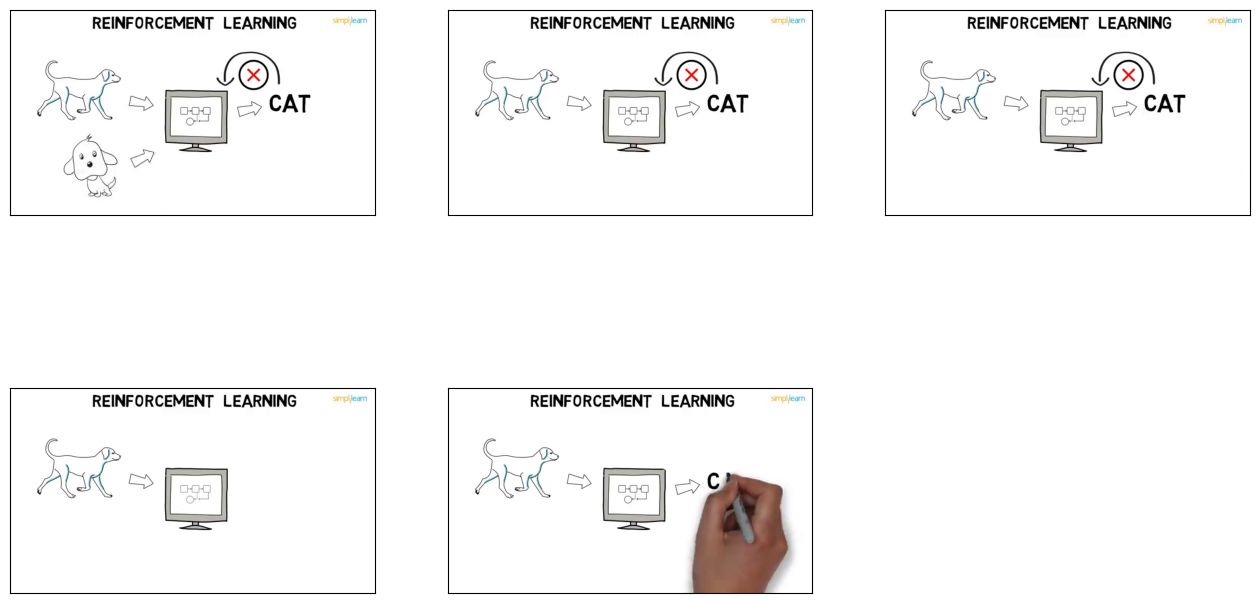

In [130]:
plot_images(img)

# ***With LLM***

Import openAi model

In [104]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [105]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4o-mini", api_key=OPENAI_API_TOKEN, max_new_tokens=100)

In [135]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

# "Based on the provided information..." -	💡 Instructions to the LLM — tells it to only use the given content and not hallucinate or use external knowledge.
# "Context: {context_str}" -	📚 This is where retrieved information (from a vector DB or index) goes — e.g., text transcript from a video, notes, OCR results from an image.
# "Metadata for video: {metadata_str}" -	🎬 This could include details like title, speaker, timestamp, video source, or even image captions.
# "Query: {query_str}" -	❓ User's question that needs to be answered.
# "Answer: " -	✍️ This is the space where the LLM will write the final answer.

In [136]:
context_str = "".join(text)  # ?

In [137]:
import json
metadata_str=json.dumps(metadata_vid)

In [138]:
query_str="what is Reinforcement Learning ?"

In [139]:
# load image data
image_documents = SimpleDirectoryReader(input_files=img).load_data()

In [140]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str,metadata_str=metadata_str,context_str=context_str
    ),
    image_documents=image_documents,
)

In [141]:
img,text=retrieve(retriever_engine,qa_tmpl_str)

**Node ID:** ebe3514d-a2d1-4d23-ab5a-2b194824272c<br>**Similarity:** 0.5992481708526611<br>**Text:** We know humans learn from their past experiences and machines follow instructions given by humans. But what if humans can't train the machines to learn from their past data and do what humans can d...<br>

In [142]:
# visualize above mentioned images
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

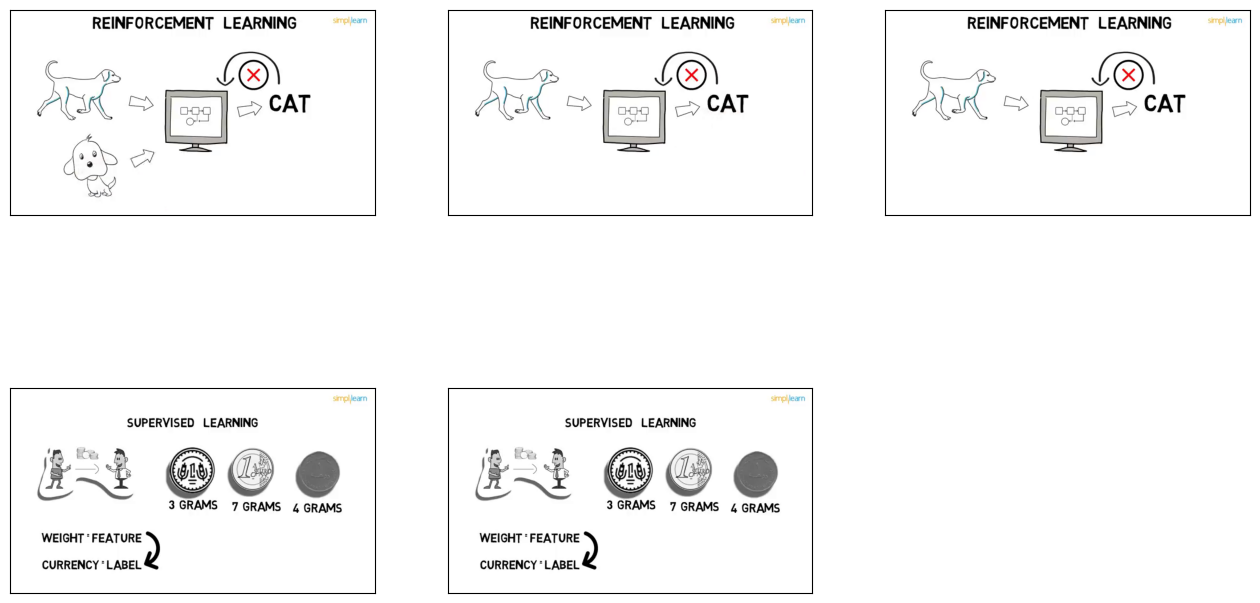

In [143]:
plot_images(img)

In [144]:
pprint(result.text)
# pp print- prity print

('Reinforcement Learning is a type of machine learning where an agent learns '
 'to make decisions by taking actions in an environment to maximize cumulative '
 'rewards. The agent receives feedback in the form of rewards or penalties '
 'based on its actions, allowing it to learn which actions yield the best '
 'outcomes over time. This learning process is similar to how animals learn '
 'through trial and error, adjusting their behavior based on the consequences '
 'of their actions.')


**without context, only with images can also it gives outputs. based on the images only.**

In [114]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

# Use when you're only providing metadata and a query — maybe because no text-based context was retrieved or available.
# when none of data(images or text) retrieved from database.